In [1]:
import matplotlib as mp
import seaborn as sb
import pandas as pd 
import numpy as np
from numpy import math
from matplotlib import pyplot as plt
import seaborn as sb


In [2]:
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

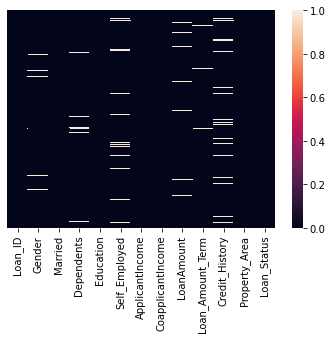

In [5]:
sb.heatmap(df.isnull(),yticklabels=False)
plt.show()

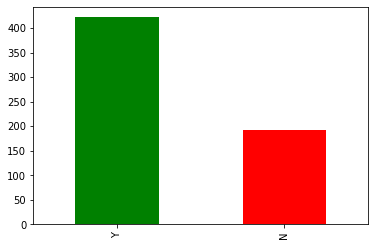

In [6]:
df["Loan_Status"].value_counts().plot(kind="bar",color=["green","red"])
plt.show()

In [7]:
categorical_val = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(categorical_val))



Number of categorical variables:  8


In [8]:
categorical_val

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [9]:
df_cat=df[categorical_val]
df_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


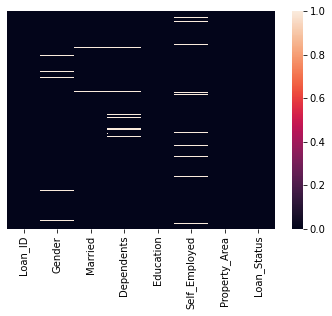

In [10]:
sb.heatmap(df_cat.isnull(),yticklabels=False)
plt.show()

In [11]:
features_nan=[feature for feature in df_cat.columns if df_cat[feature].isnull().sum()>0]
def replace_cat_feature(df_cat,features_nan):
    data=df_cat.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df_cat=replace_cat_feature(df_cat,features_nan)

df_cat[features_nan].isnull().sum()

Gender           0
Married          0
Dependents       0
Self_Employed    0
dtype: int64

In [12]:
df_cat.drop("Loan_ID",axis=1,inplace=True)

In [13]:
cat_val=df_cat.columns
cat_val

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

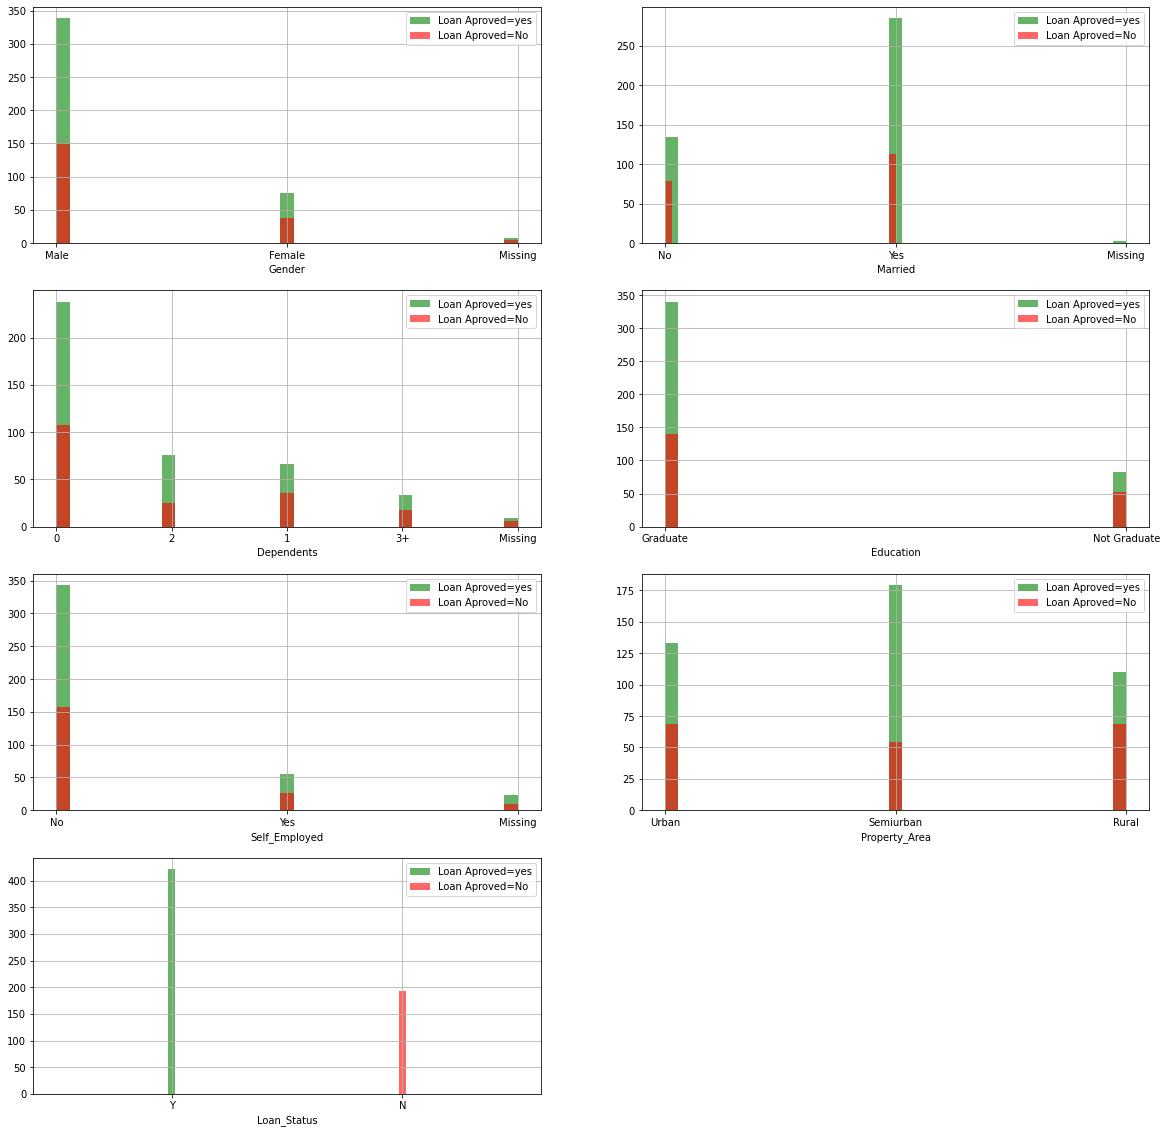

In [14]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(cat_val, 1):
    plt.subplot(4, 2, i)
    df_cat[df_cat["Loan_Status"] == "Y"][column].hist(bins=35, color='green', label='Loan Aproved=yes', alpha=0.6)
    df_cat[df_cat["Loan_Status"] == "N"][column].hist(bins=35, color='red', label='Loan Aproved=No', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [15]:
numerical_val = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_val))


Number of numerical variables:  5


In [16]:
df_num=df[numerical_val]
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


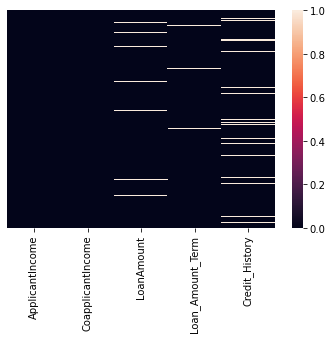

In [17]:
sb.heatmap(df_num.isnull(),yticklabels=False)
plt.show()

In [18]:
features_num_nan=[feature for feature in df_num.columns if df_num[feature].isnull().sum()>0]
def replace_num_feature(df_num,features_num_nan):
    data=df_num.copy()
    data[features_num_nan]=data[features_num_nan].fillna(0)
    return data

df_num=replace_num_feature(df_num,features_num_nan)

df_num[features_num_nan].isnull().sum()

LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
dtype: int64

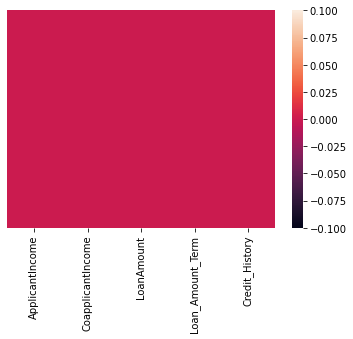

In [19]:
sb.heatmap(df_num.isnull(),yticklabels=False)
plt.show()

In [20]:
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,0.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [22]:
num_val=df_num.columns

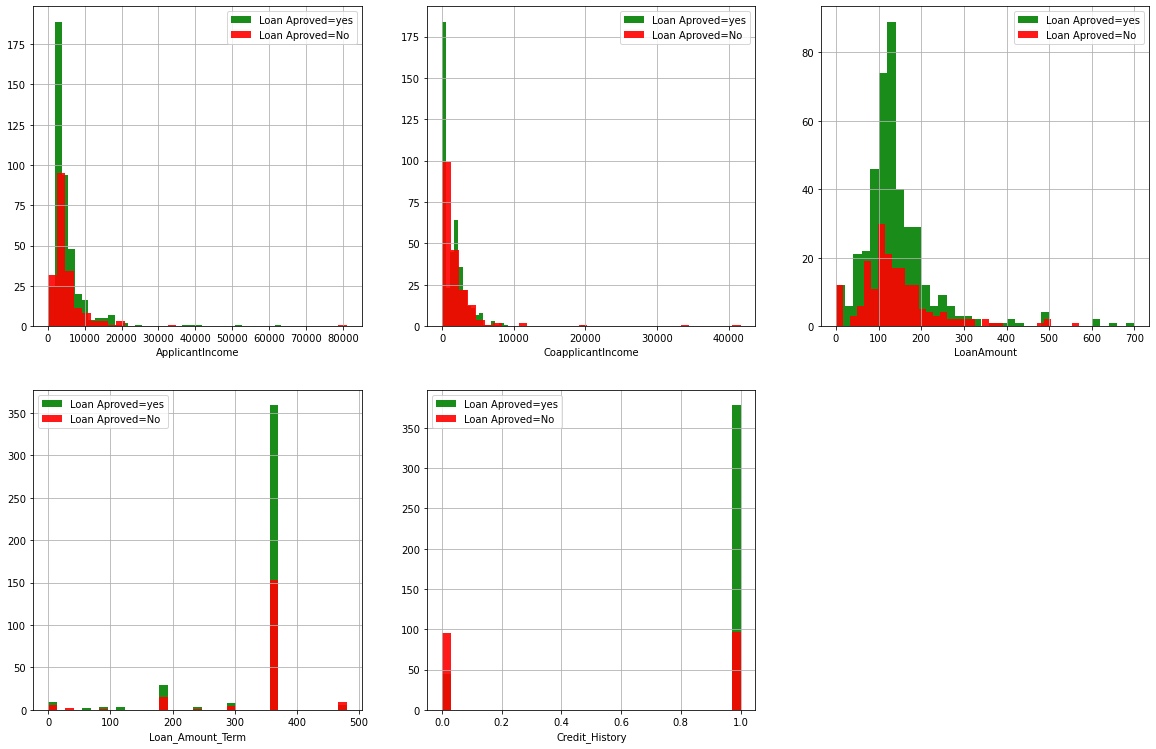

In [23]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(num_val, 1):
    plt.subplot(3, 3, i)
    df_num[df["Loan_Status"] == "Y"][column].hist(bins=35, color='green', label='Loan Aproved=yes', alpha=0.9)
    df_num[df["Loan_Status"] == "N"][column].hist(bins=35, color='red', label='Loan Aproved=No', alpha=0.9)
    plt.legend()
    plt.xlabel(column)

In [24]:
corr_matrix=df_num.corr()


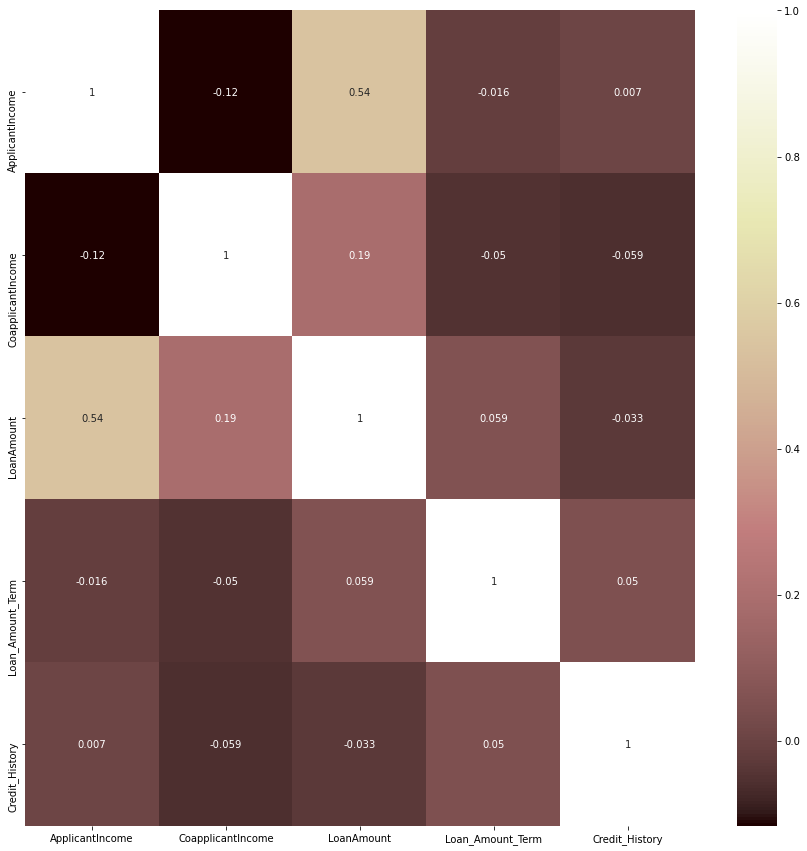

In [25]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sb.heatmap(corr_matrix,annot=True,cmap="pink")

In [27]:
data=df.copy()
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
data.shape

(614, 13)

In [39]:
data1=data.dropna(axis=0)
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [32]:
data1.shape

(480, 13)

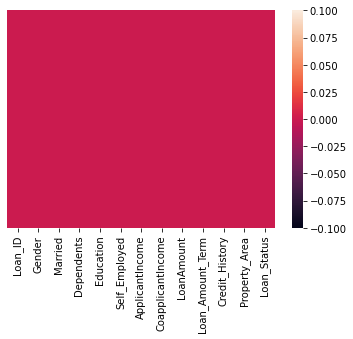

In [33]:
sb.heatmap(data1.isnull(),yticklabels=False)
plt.show()

In [40]:
data1.drop(["Loan_ID"],axis=1,inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [42]:
data1.shape

(480, 12)

In [43]:
gender=pd.get_dummies(data1["Gender"],drop_first=True)
gender.head()

,Male
1,1
2,1
3,1
4,1
5,1


In [44]:
married=pd.get_dummies(data1["Married"],drop_first=True)
married.head()

,Yes
1,1
2,1
3,1
4,0
5,1


In [45]:
education=pd.get_dummies(data1["Education"],drop_first=True)
education.head()

,Not Graduate
1,0
2,0
3,1
4,0
5,0


In [47]:
self_employed=pd.get_dummies(data1["Self_Employed"],drop_first=True)
self_employed.head()

,Yes
1,0
2,1
3,0
4,0
5,1


In [48]:
prop_area=pd.get_dummies(data1["Property_Area"],drop_first=True)
prop_area.head()

,Semiurban,Urban
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1


In [49]:
loan_status=pd.get_dummies(data1["Loan_Status"],drop_first=True)
loan_status.head()

,Y
1,0
2,1
3,1
4,1
5,1


In [51]:
data2=data1.copy()
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [52]:
data2=pd.concat([data2,gender,married,education,self_employed,prop_area,loan_status],axis=1)
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1,0,1,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,0,1,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0,1,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,0,1,0,1,1


In [53]:
data2.drop(["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"],axis=1,inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
data2.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1


In [55]:
data2.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Male                 0
Yes                  0
Not Graduate         0
Yes                  0
Semiurban            0
Urban                0
Y                    0
dtype: int64

In [70]:
data2.drop(["Dependents"],axis=1,inplace=True)
data2.head()

KeyError: "['Dependents'] not found in axis"

In [71]:
data2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [57]:

from sklearn.preprocessing import StandardScaler

In [72]:
X=data2.drop("Y",axis=1)
y=data2["Y"]

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
le=LogisticRegression()

In [75]:
y_test

92     1
529    1
505    1
358    0
512    1
      ..
559    1
143    1
50     1
203    1
572    1
Name: Y, Length: 159, dtype: uint8

In [76]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
153,2281,0.0,113.0,360.0,1.0,1,1,1,0,0,0
149,4860,830.0,125.0,360.0,1.0,1,1,0,0,1,0
342,4554,1229.0,158.0,360.0,1.0,1,1,1,0,0,1
546,3358,0.0,80.0,36.0,1.0,1,0,1,0,1,0
185,39147,4750.0,120.0,360.0,1.0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
141,5417,0.0,168.0,360.0,1.0,1,0,0,0,0,1
350,9083,0.0,228.0,360.0,1.0,1,1,0,0,1,0
445,3466,1210.0,130.0,360.0,1.0,1,1,0,1,0,0
558,3887,2669.0,162.0,360.0,1.0,1,1,0,0,1,0


In [77]:
y_train

153    0
149    1
342    1
546    0
185    1
      ..
141    1
350    1
445    1
558    1
137    1
Name: Y, Length: 321, dtype: uint8

In [78]:
le.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred=le.predict(X_test)

In [84]:
confusion_matrix=confusion_matrix(y_test,y_pred)

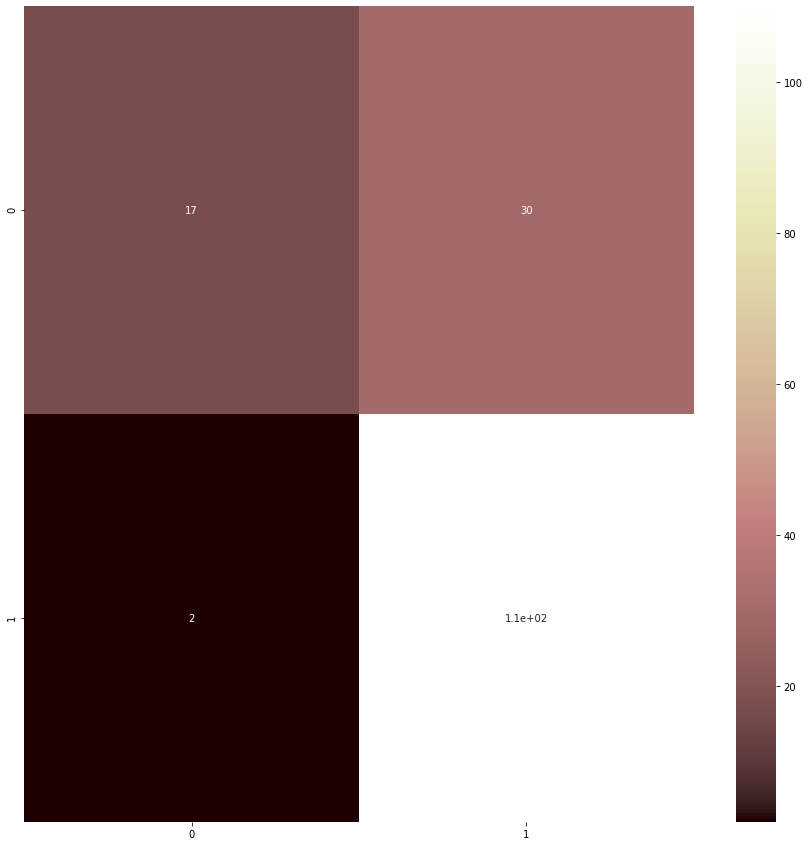

In [85]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sb.heatmap(confusion_matrix,annot=True,cmap="pink")

In [81]:
accuracy_score(y_test,y_pred)

0.7987421383647799